<a href="https://colab.research.google.com/github/DataMinati/Super-Notebooks-100/blob/main/Movie_Rating_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import datetime

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/MainakRepositor/Datasets-/master/Movie-Dataset-Latest.csv')
df.head()

,Unnamed: 0,id,title,release_date,overview,popularity,vote_average,vote_count,video
0,0,19404,Dilwale Dulhania Le Jayenge,1995-10-20,"Raj is a rich, carefree, happy-go-lucky second...",25.884,8.7,3304,False
1,1,278,The Shawshank Redemption,1994-09-23,Framed in the 1940s for the double murder of h...,60.110,8.7,20369,False
2,2,238,The Godfather,1972-03-14,"Spanning the years 1945 to 1955, a chronicle o...",62.784,8.7,15219,False
3,3,724089,Gabriel's Inferno Part II,2020-07-31,Professor Gabriel Emerson finally learns the t...,28.316,8.6,1360,False
4,4,424,Schindler's List,1993-11-30,The true story of how businessman Oskar Schind...,38.661,8.6,12158,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9463 entries, 0 to 9462
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    9463 non-null   int64  
 1   id            9463 non-null   int64  
 2   title         9463 non-null   object 
 3   release_date  9463 non-null   object 
 4   overview      9449 non-null   object 
 5   popularity    9463 non-null   float64
 6   vote_average  9463 non-null   float64
 7   vote_count    9463 non-null   int64  
 8   video         9463 non-null   bool   
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 600.8+ KB


In [4]:
df['release_date']=pd.to_datetime(df['release_date'],format='%Y-%m-%d')
df['year']=df['release_date'].dt.year
df['month']=df['release_date'].dt.month
df1=df.drop(['Unnamed: 0','id','release_date','overview','video','year','month'],axis=1)
df_100=df.sort_values('popularity',ascending=False).head(100)

<AxesSubplot:>

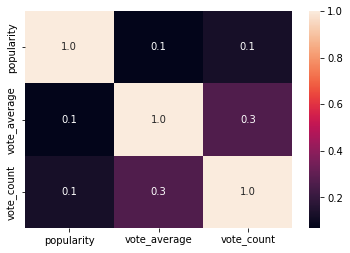

In [5]:
sns.heatmap(df1.corr(),annot=True, fmt="1.1f")

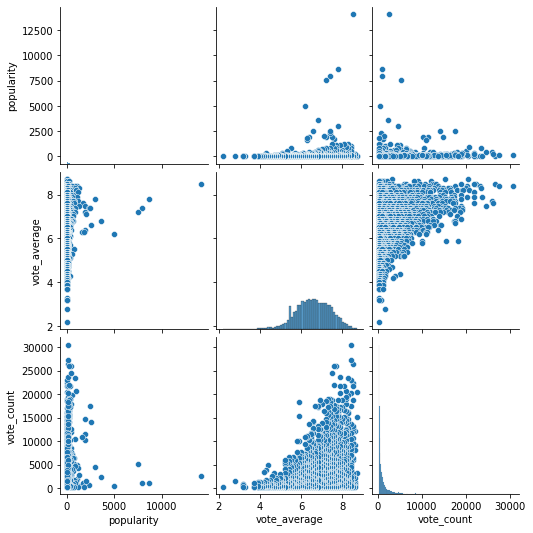

In [6]:
sns.pairplot(df1)

<AxesSubplot:xlabel='year'>

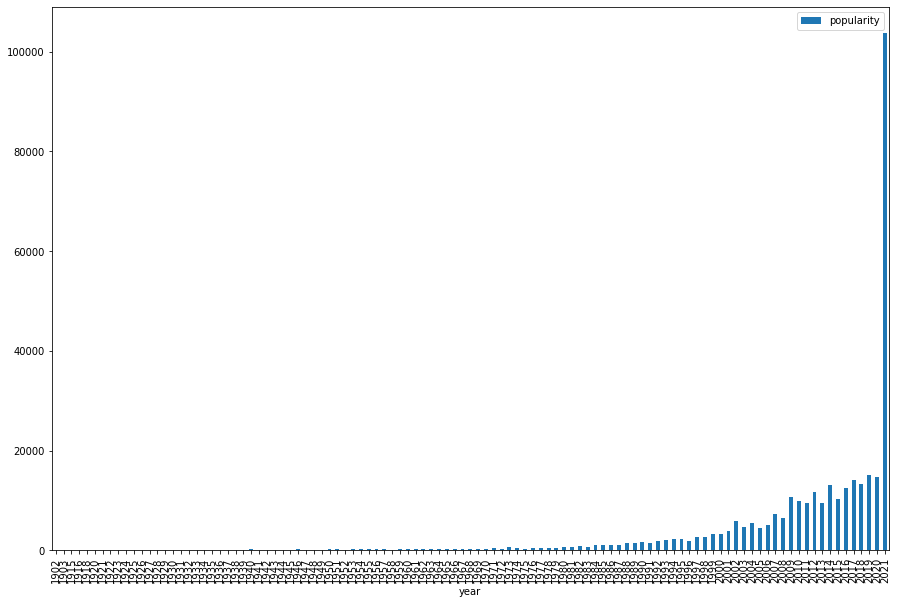

In [7]:
df_year=pd.DataFrame(df.groupby('year')['popularity'].sum())
df_year.plot.bar(figsize=(15,10))

In [8]:
df_100.head(10)

,Unnamed: 0,id,title,release_date,overview,popularity,vote_average,vote_count,video,year,month
23,23,634649,Spider-Man: No Way Home,2021-12-15,Peter Parker is unmasked and no longer able to...,14136.690,8.5,2654,False,2021,12
691,691,568124,Encanto,2021-11-24,"The tale of an extraordinary family, the Madri...",8663.277,7.8,1065,False,2021,11
1748,1748,624860,The Matrix Resurrections,2021-12-16,"Plagued by strange memories, Neo's life takes ...",7976.130,7.4,1029,False,2021,12
2371,2371,580489,Venom: Let There Be Carnage,2021-09-30,After finding a host body in investigative rep...,7537.265,7.2,5184,False,2021,9
6333,6333,460458,Resident Evil: Welcome to Raccoon City,2021-11-24,Once the booming home of pharmaceutical giant ...,4973.769,6.2,456,False,2021,11
3796,3796,512195,Red Notice,2021-11-04,An Interpol-issued Red Notice is a global aler...,3644.595,6.8,2294,False,2021,11
587,587,566525,Shang-Chi and the Legend of the Ten Rings,2021-09-01,Shang-Chi must confront the past he thought he...,2967.672,7.8,4608,False,2021,9
4674,4674,1930,The Amazing Spider-Man,2012-06-23,Peter Parker is an outcast high schooler aband...,2514.446,6.6,13992,False,2012,6
1715,1715,315635,Spider-Man: Homecoming,2017-07-05,Following the events of Captain America: Civil...,2474.781,7.4,17559,False,2017,7
1581,1581,585245,Clifford the Big Red Dog,2021-11-10,As Emily struggles to fit in at home and at sc...,2311.807,7.4,712,False,2021,11


<AxesSubplot:ylabel='title'>

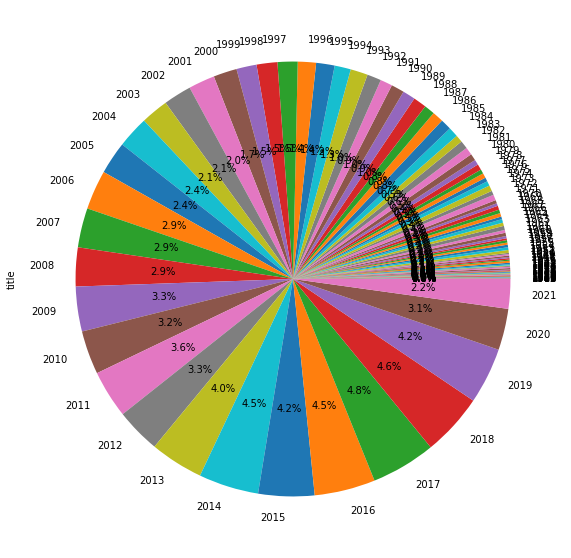

In [9]:
df.groupby('year')['title'].count().plot.pie(figsize=(10,10),autopct="%1.1f%%")

<AxesSubplot:ylabel='title'>

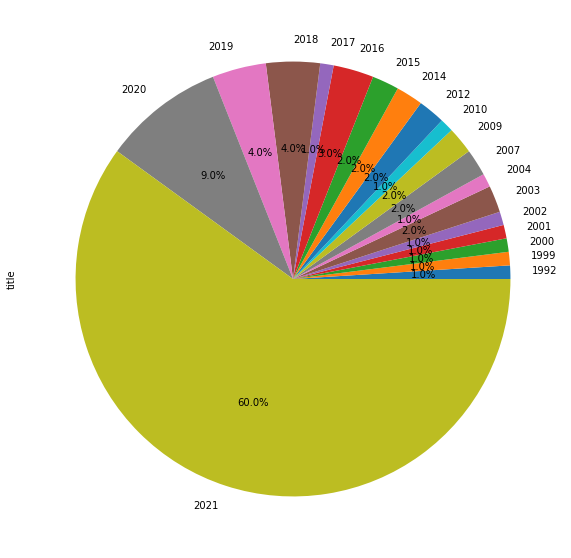

In [10]:
df_100.groupby('year')['title'].count().plot.pie(figsize=(10,10),autopct="%1.1f%%")

<AxesSubplot:ylabel='popularity'>

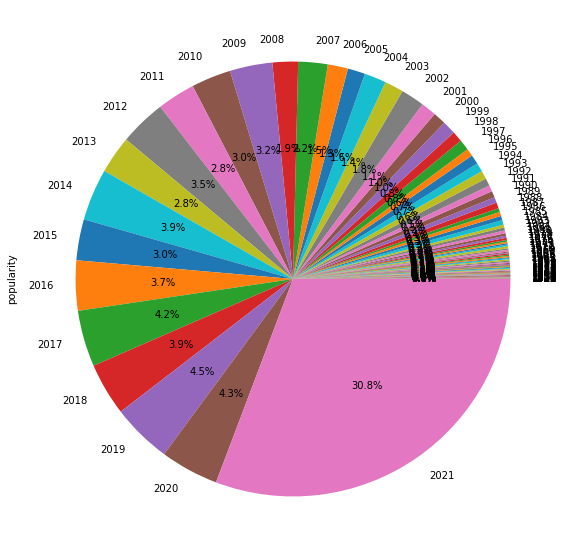

In [11]:
df.groupby('year')['popularity'].sum().plot.pie(figsize=(10,10),autopct="%1.1f%%")

<AxesSubplot:ylabel='popularity'>

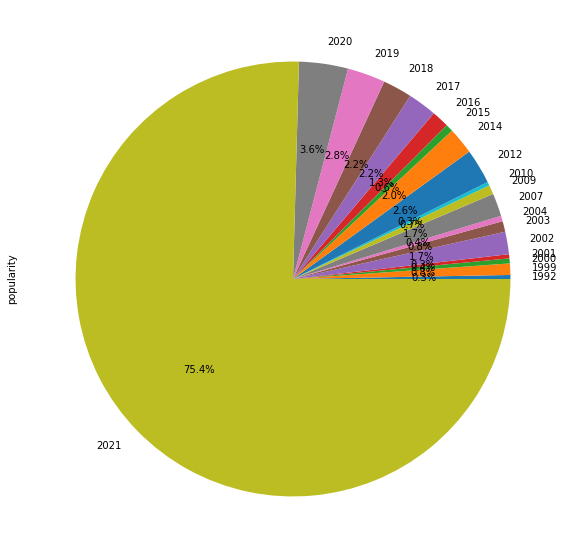

In [12]:
df_100.groupby('year')['popularity'].sum().plot.pie(figsize=(10,10),autopct="%1.1f%%")

In [13]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
import string
nltk.download('stopwords')
nltk.download('punkt')
list_stopwords = set(stopwords.words('english'))

from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [14]:
df_nlp=df_100.copy()

In [15]:
df_nlp['title2'] = df_nlp['title'].str.lower()
df_nlp['title2'] = df_nlp['title2'].apply(word_tokenize)
df_nlp['title2'] = df_nlp['title2'].apply(lambda x: [word for word in x if word not in list_stopwords])
df_nlp['title2'] = df_nlp['title2'].apply(lambda x : [word.translate(str.maketrans('', '', string.punctuation)) for word in x])
df_nlp['title2'] = df_nlp['title2'].apply(lambda x : [word for word in x if len(word) > 1])
df_nlp['overview2'] = df_nlp['overview'].str.lower()
df_nlp['overview2'] = df_nlp['overview2'].apply(word_tokenize)
df_nlp['overview2'] = df_nlp['overview2'].apply(lambda x: [word for word in x if word not in list_stopwords])
df_nlp['overview2'] = df_nlp['overview2'].apply(lambda x : [word.translate(str.maketrans('', '', string.punctuation)) for word in x])
df_nlp['overview2'] = df_nlp['overview2'].apply(lambda x : [word for word in x if len(word) > 1])

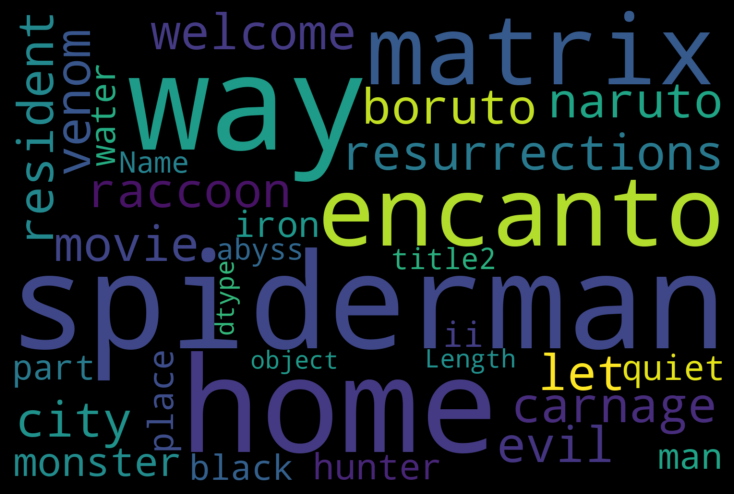

In [16]:
text1 = df_nlp['title2']
wordcloud = WordCloud(
    width = 1500,
    height = 1000,
    background_color = 'black',
    stopwords = list_stopwords).generate(str(text1))
fig = plt.figure(
    figsize = (10, 8),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

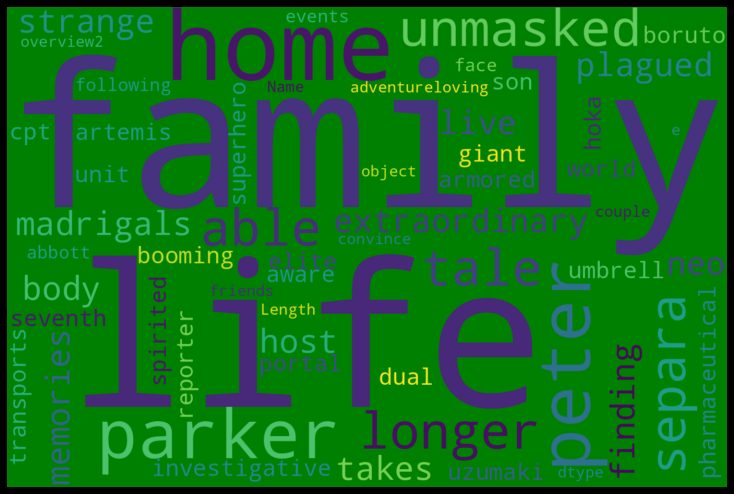

In [17]:
text2 = df_nlp['overview2']
wordcloud = WordCloud(
    width = 1500,
    height = 1000,
    background_color = 'green',
    stopwords = list_stopwords).generate(str(text2))
fig = plt.figure(
    figsize = (10, 8),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [18]:
pip install pycaret --ignore-installed llvmlite numba

  Using cached pycaret-2.3.6-py3-none-any.whl (301 kB)
  Using cached llvmlite-0.38.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.5 MB)
  Using cached numba-0.55.0-1-cp37-cp37m-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (3.3 MB)
  Using cached textblob-0.17.1-py2.py3-none-any.whl (636 kB)
  Using cached ipywidgets-7.6.5-py2.py3-none-any.whl (121 kB)
  Using cached wordcloud-1.8.1-cp37-cp37m-manylinux1_x86_64.whl (366 kB)
  Using cached Boruta-0.3-py3-none-any.whl (56 kB)
  Using cached kmodes-0.11.1-py2.py3-none-any.whl (19 kB)
  Using cached mlxtend-0.19.0-py2.py3-none-any.whl (1.3 MB)
  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
  Using cached spacy-2.3.7-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.4 MB)
  Using cached plotly-5.5.0-py2.py3-none-any.whl (26.5 MB)
  Using cached matplotlib-3.5.1-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
  Using cached imbalanced_learn-0.7.0-py3-none-any.whl (167 kB)
  Using cached

In [19]:
from pycaret.clustering import *
clu = setup(df1,silent=True,session_id=1)

,Description,Value
0,session_id,1
1,Original Data,"(9463, 4)"
2,Missing Values,False
3,Numeric Features,3
4,Categorical Features,1
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(9463, 9153)"
9,CPU Jobs,-1


In [20]:
kmeans = create_model('kmeans',num_clusters=4)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7493,28261.3865,0.5047,0,0,0


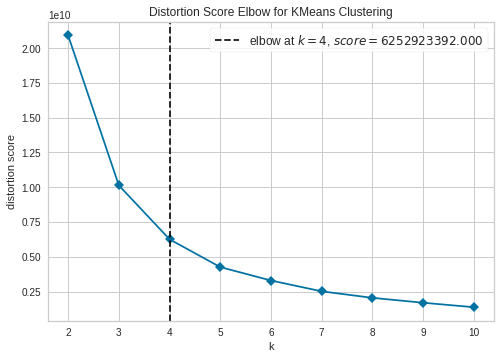

In [21]:
plot_model(kmeans, 'elbow')

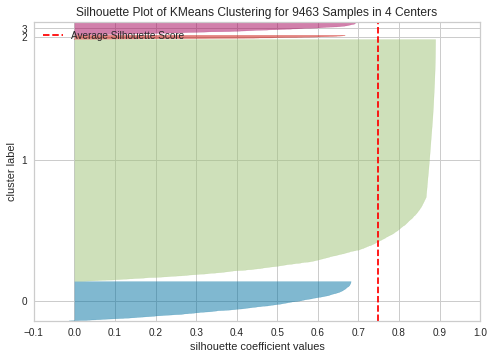

In [22]:
plot_model(kmeans, plot = 'silhouette')

In [23]:
kmeans_df = assign_model(kmeans)
kmeans_df.head(5)

,title,popularity,vote_average,vote_count,Cluster
0,Dilwale Dulhania Le Jayenge,25.884,8.7,3304,Cluster 0
1,The Shawshank Redemption,60.110,8.7,20369,Cluster 2
2,The Godfather,62.784,8.7,15219,Cluster 2
3,Gabriel's Inferno Part II,28.316,8.6,1360,Cluster 1
4,Schindler's List,38.661,8.6,12158,Cluster 3


In [24]:
plot_model(kmeans)

In [25]:
plot_model(kmeans,'distribution')

In [26]:
kmeans_df.groupby('Cluster').describe().T

Cluster                Cluster 0    Cluster 1     Cluster 2     Cluster 3
popularity   count   1253.000000  7692.000000    126.000000    392.000000
             mean      70.343420    24.470452    200.175762     91.922092
             std      476.508710   159.392309    360.843279    180.772129
             min        0.600000     0.600000      9.833000      1.502000
             25%       18.230000     8.376500     67.370250     30.851000
             50%       29.059000    10.961000    111.079500     50.279500
             75%       49.578000    17.233250    174.910500     93.326500
             max    14136.690000  8663.277000   2514.446000   1958.483000
vote_average count   1253.000000  7692.000000    126.000000    392.000000
             mean       6.799761     6.514405      7.668254      7.221173
             std        0.698258     0.816282      0.563227      0.672884
             min        4.200000     2.200000      5.900000      5.200000
             25%        6.300000     6.000000      7.300000      6.800000
             50%        6.800000     6.500000      7.700000      7.300000
             75%        7.300000     7.100000      8.100000      7.700000
             max        8.700000     8.600000      8.700000      8.600000
vote_count   count   1253.000000  7692.000000    126.000000    392.000000
             mean    3395.648045   624.316563  16441.579365   8183.704082
             std     1045.508994   439.294975   3601.141404   1802.522834
             min     2011.000000   200.000000  12331.000000   5800.000000
             25%     2512.000000   287.000000  13778.750000   6595.750000
             50%     3135.000000   451.000000  15458.500000   7890.500000
             75%     4183.000000   843.250000  17967.500000   9490.000000
             max     5781.000000  2008.000000  30535.000000  12193.000000

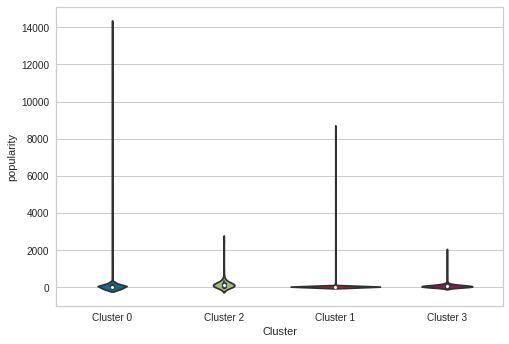

In [27]:
sns.violinplot(x='Cluster', y='popularity', data=kmeans_df)
plt.show()

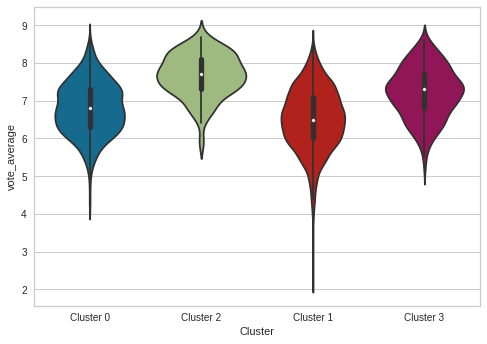

In [28]:
sns.violinplot(x='Cluster', y='vote_average', data=kmeans_df)
plt.show()

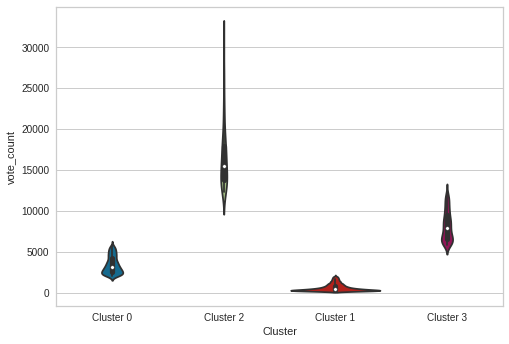

In [29]:
sns.violinplot(x='Cluster', y='vote_count', data=kmeans_df)
plt.show()

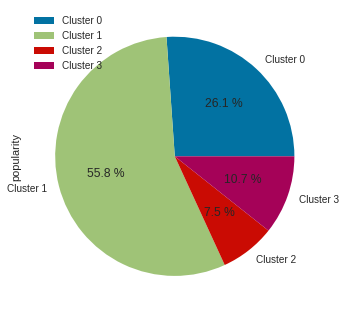

In [30]:
kmeans_df.groupby('Cluster').sum().plot.pie(y='popularity',autopct="%1.1f %%")
plt.legend(loc="upper left")

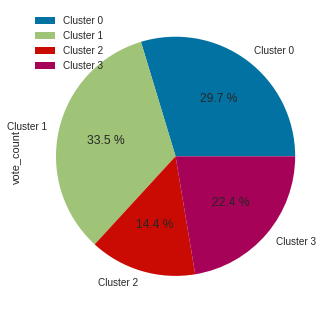

In [31]:
kmeans_df.groupby('Cluster').sum().plot.pie(y='vote_count',autopct="%1.1f %%")
plt.legend(loc="upper left")

<AxesSubplot:xlabel='Cluster'>

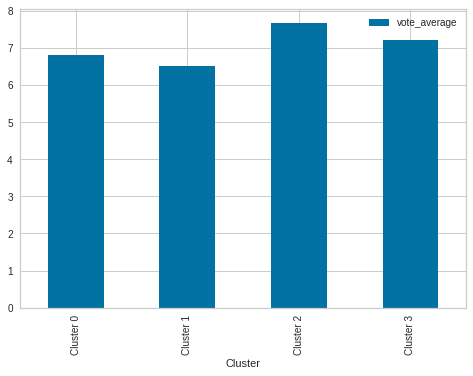

In [32]:
kmeans_df.groupby('Cluster').mean().plot.bar(y='vote_average')

In [33]:
df['Cluster']=kmeans_df['Cluster']
df_100_cluster=df.sort_values('popularity',ascending=False).head(100)
df_100_cluster.head()

,Unnamed: 0,id,title,release_date,overview,popularity,vote_average,vote_count,video,year,month,Cluster
23,23,634649,Spider-Man: No Way Home,2021-12-15,Peter Parker is unmasked and no longer able to...,14136.690,8.5,2654,False,2021,12,Cluster 0
691,691,568124,Encanto,2021-11-24,"The tale of an extraordinary family, the Madri...",8663.277,7.8,1065,False,2021,11,Cluster 1
1748,1748,624860,The Matrix Resurrections,2021-12-16,"Plagued by strange memories, Neo's life takes ...",7976.130,7.4,1029,False,2021,12,Cluster 1
2371,2371,580489,Venom: Let There Be Carnage,2021-09-30,After finding a host body in investigative rep...,7537.265,7.2,5184,False,2021,9,Cluster 0
6333,6333,460458,Resident Evil: Welcome to Raccoon City,2021-11-24,Once the booming home of pharmaceutical giant ...,4973.769,6.2,456,False,2021,11,Cluster 1


<AxesSubplot:xlabel='popularity', ylabel='vote_average'>

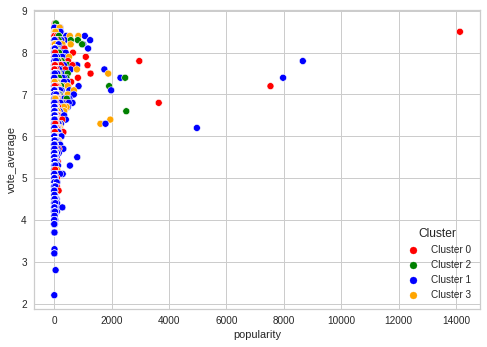

In [34]:
sns.scatterplot(data=df,x='popularity', y='vote_average',hue='Cluster',palette={'Cluster 0': 'red',
                      'Cluster 1': 'blue',
                      'Cluster 2': 'green',
                      'Cluster 3': 'orange'})

<AxesSubplot:xlabel='popularity', ylabel='vote_count'>

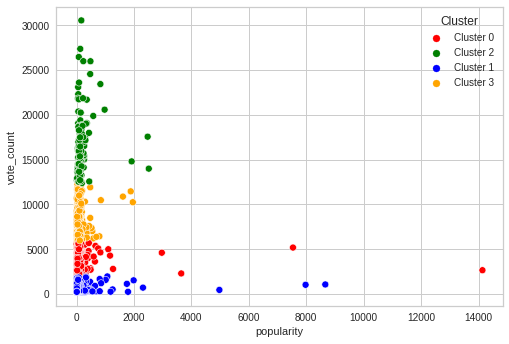

In [35]:
sns.scatterplot(data=df,x='popularity', y='vote_count',hue='Cluster',palette={'Cluster 0': 'red',
                      'Cluster 1': 'blue',
                      'Cluster 2': 'green',
                      'Cluster 3': 'orange'})

<AxesSubplot:xlabel='vote_average', ylabel='vote_count'>

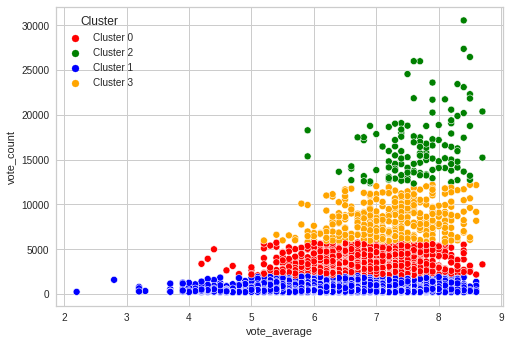

In [36]:
sns.scatterplot(data=df,x='vote_average', y='vote_count',hue='Cluster',palette={'Cluster 0': 'red',
                      'Cluster 1': 'blue',
                      'Cluster 2': 'green',
                      'Cluster 3': 'orange'})

<AxesSubplot:xlabel='year,Cluster'>

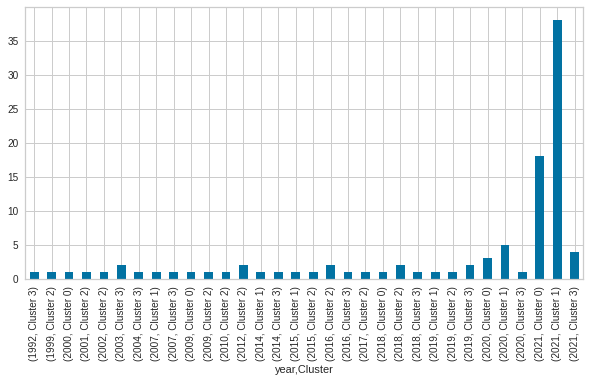

In [37]:
df_100_cluster.groupby(['year','Cluster'])['title'].count().plot.bar(figsize=(10,5))